In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [15]:
path1 = '../results/HPC_runs/02_15/'
path2 = '../results/HPC_runs/10_5_512_bs/'
path3 = '../results/HPC_runs/lr_3_bs_64/'

losses1 = np.load(path1+'losses.npy')
test_accuracies1 = np.load(path1+'test_accuracies.npy')
train_accuracies1 = np.load(path1+'train_accuracies.npy')

losses2 = np.load(path2+'losses.npy')
test_accuracies2 = np.load(path2+'test_accuracies.npy')
train_accuracies2 = np.load(path2+'train_accuracies.npy')

losses3 = np.load(path3+'losses.npy')
test_accuracies3 = np.load(path3+'test_accuracies.npy')
train_accuracies3 = np.load(path3+'train_accuracies.npy')

losses1 = np.mean(losses1,axis=0)
losses2 = np.mean(losses2,axis=0)
losses3 = np.mean(losses3,axis=0)
train_accuracies1 = np.mean(train_accuracies1,axis=0)
test_accuracies1  = np.mean(test_accuracies1,axis=0)
train_accuracies2 = np.mean(train_accuracies2,axis=0)
test_accuracies2  = np.mean(test_accuracies2,axis=0)
train_accuracies3 = np.mean(train_accuracies3,axis=0)
test_accuracies3  = np.mean(test_accuracies3,axis=0)

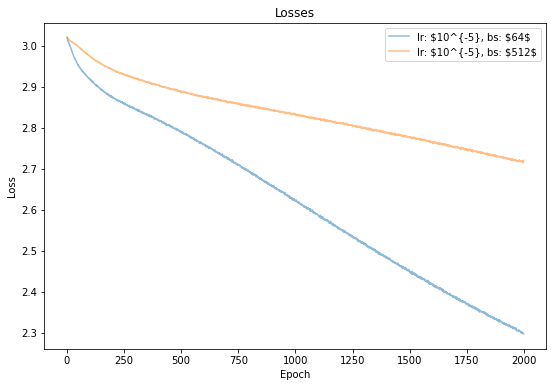

In [16]:
plt.figure(figsize=(9,6))
plt.plot(losses1, alpha=0.5, c='tab:blue', label='lr: $10^{-5}, bs: $64$')
plt.plot(losses2*losses1[0]/losses2[0], alpha=0.5, c='tab:orange', label='lr: $10^{-5}, bs: $512$')
plt.plot(losses3*losses1[0]/losses3[0], alpha=0.5, c='tab:orange', label='lr: $10^{-3}, bs: $64$')
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

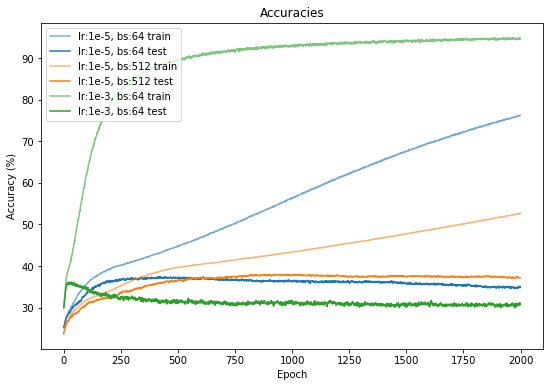

In [19]:
plt.figure(figsize=(9,6))

plt.plot(train_accuracies1*100, label='lr:1e-5, bs:64 train',c='tab:blue', alpha=0.6)
plt.plot(test_accuracies1*100, label='lr:1e-5, bs:64 test', c='tab:blue', alpha=1)

plt.plot(train_accuracies2*100, label='lr:1e-5, bs:512 train', c='tab:orange', alpha=0.6)
plt.plot(test_accuracies2*100, label='lr:1e-5, bs:512 test', c='tab:orange', alpha=1)

plt.plot(train_accuracies3*100, label='lr:1e-3, bs:64 train', c='tab:green', alpha=0.6)
plt.plot(test_accuracies3*100, label='lr:1e-3, bs:64 test', c='tab:green', alpha=1)

plt.title('Accuracies')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()